# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/machinelearning-az.git

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10497, done.
remote: Total 10497 (delta 0), reused 0 (delta 0), pack-reused 10497
Receiving objects: 100% (10497/10497), 310.48 MiB | 34.36 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [3]:
!pip install sklearn

# Regresión Logística


# Cómo importar las librerías


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [5]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 3 - Classification/Section 14 - Logistic Regression/Social_Network_Ads.csv')
#Permiten seleccionar solo ciertas columnas con ataset.iloc[:, [2,3]].values
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values
print(dataset)
print(X)

      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]
[[1.90e+01 1.90e+04]
 [3.50e+01 2.00e+04]
 [2.60e+01 4.30e+04]
 [2.70e+01 5.70e+04]
 [1.90e+01 7.60e+04]
 [2.70e+01 5.80e+04]
 [2.70e+01 8.40e+04]
 [3.20e+01 1.50e+05]
 [2.50e+01 3.30e+04]
 [3.50e+01 6.50e+04]
 [2.60e+01 8.00e+04]
 [2.60e+01 5.20e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.80e+04]
 [1.80e+01

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [6]:
from sklearn.model_selection import train_test_split
#Al 400 casos, dividimos los datos en 300 y 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicción de los resultados con el Conjunto de Testing


In [11]:
y_pred  = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


# Elaborar una matriz de confusión

In [12]:
from sklearn.metrics import confusion_matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [14]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


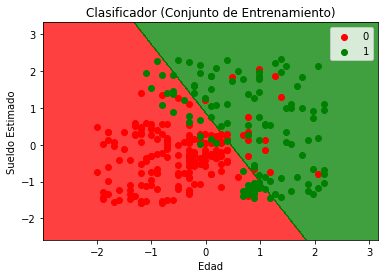

In [15]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


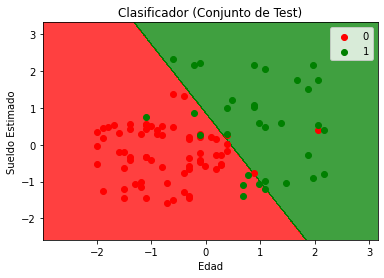

In [16]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

In [19]:
#De acuerdo a la prob. de comprar o no. Compra = 1 | No compra = 0
#65 casos (rojos) no compran y 24 casos (verdes) me dice que si compran
#3 casos que predecimos que compran, pero en realidad no compran
#8 casos que predecimos que no compran, pero en realidad compran
print(cm)

[[65  3]
 [ 8 24]]
